## Finite Markov Decision Processes

The Markov formalism for decision-making processes can be briefly described in several terms:


<b>Agent</b> - a subject that can perform some action


<b>Environment</b> - the world with which the agent interacts, which has its own rules


<b>State</b> - the current state of the environment, is an element of the set <b>S</b>


<b>Action</b> - agent's action, selected from the set <b>A</b>


<b>Reward</b> - the reward received by the agent is an element of the set <b>R</b>

<img src="media/markov_processes.png" width=600/>

At each step <b>t</b>, the Agent receives a reward <b>Rt</b> and the state of the environment <b>St</b>. Based on this data and own <b>policy</b>, the Agent chooses the next action <b>At</b>.

## Expected return

In general, we seek to maximize the expected return, where the return <b>Gt</b> is defined as some specific function of the reward sequence. In the simplest case the return is the sum of the rewards:

<img src="media/return.png" width=400/>

The additional concept that we need is that of <b>discounting</b>. According to this approach, the agent tries to select actions so that the sum of the discounted rewards it receives over the future is maximized. In particular, it chooses <b>At</b> to maximize the expected discounted return:

<img src="media/discounted_return.png" width=600/>


## Bellman equation

We can iteratively express the value of a state in terms of the values of other states (which can be accessed from this one)

<img src="media/bellman_equation.png" width=600/>

Accordingly, knowing the dynamics of the environment and the strategy, we can obtain a system of linear equations for the values of the states, which can be solved uniquely.

## Example: Grid world

The cells of the grid correspond to the states of the environment. At each cell, four actions are possible: north, south, east, and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its location unchanged, but also result in a reward of <b>−1</b>. Other actions result in a reward of <b>0</b>, except those that move the agent out of the special states <b>A</b> and <b>B</b>. From state <b>A</b>, all four actions yield a reward of <b>+10</b> and take the agent to <b>A'</b>. From state <b>B</b>, all actions yield a reward of <b>+5</b> and take the agent to <b>B'</b>.

<img src="media/grid_world.png" width=500/>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Bellman equations for random policy

With equiprobable random policy Agent selects all four actions in all states with probability P=1/4

We write the system of Bellman equations for all states (25) in the form of coefficients in front of the values of the states. Then we should get a 25 by 25 matrix. There is also a column of free members of size 25.

Let's also start by assuming gamma = 0 (greedy agent)

### Calculating Bellman equation coeffitients

Let's write a function to get the coefficients of the Bellman equation for one state (in line <b>i</b> and column <b>j</b>)

<b>gamma</b> - depreciation factor (the smaller it is, the more greedy our strategy is)

<b>A, B, A_, B_</b> - selected states according to the condition of the problem

<b>grid_side</b> - size of grid side (assumed to be a square)


In [2]:
def calculate_value(i, j, gamma, A, B, A_, B_, grid_side=5):
    
    #coefficients before state values in the Bellman equation 
    k_value = np.zeros(grid_side**2)
    # free value in the Bellman equation
    d_value = 0
    
    # checking special states
    if (i, j) == A:
        k_value[A_[0] + A_[1] * grid_side] = gamma
        d_value = 10
    elif (i, j) == B:
        k_value[B_[0] + B_[1] * grid_side] = gamma
        d_value = 5
    else:
        # checking border transitions (existence of neighboring cells)
        for near_state in [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]:
            if near_state in np.ndindex(grid_side,grid_side):
                # reward is not awarded
                k_value[near_state[0] + near_state[1]*grid_side] = 0.25 * gamma
            else:
                # reward is -1 and the state stays the same
                k_value[i + j * grid_side] = 0.25 * gamma
                d_value = d_value - 0.25 * 1       
    return k_value, d_value

def vizualize_grid_values(v):
    fig, ax = plt.subplots()
    ax.matshow(v, cmap='summer')
    for (i, j), z in np.ndenumerate(v):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    plt.show()

In [3]:
# set specific states
A = (1, 0)
B = (3, 0)
A_ = (1, 4)
B_ = (3, 2)

In [4]:
# matrix of coefficients before state values in the Bellman equation system
koefs = np.zeros((25,25))
# column of free values in the Bellman equation system
dependent = np.zeros(25)
# greedy strategy
gamma = 0

for j in range(5):
    for i in range(5):
        koefs[i + j*5], dependent[i + j*5]  = calculate_value(i, j, gamma, A, B, A_, B_, grid_side=5)
        koefs[i + j*5, i + j*5] = koefs[i + j*5, i + j*5] - 1        

#print(koefs)
#print(dependent)

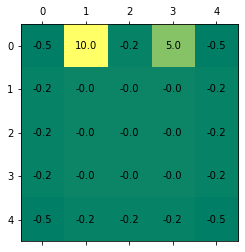

In [5]:
# solve linear equation system via numpy solver
v = np.linalg.solve(koefs, -dependent)
v = v.reshape((5,5))
# this is values of grid world states with equiprobable random policy and gamma=0
vizualize_grid_values(v)

Change the gamma to 0.9 - this is a less greedy strategy with more long-term planning

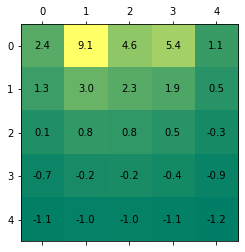

In [6]:
# matrix of coefficients before state values in the Bellman equation system
koefs = np.zeros((25,25))
# column of free values in the Bellman equation system
dependent = np.zeros(25)
# greedy strategy
gamma = 0.9

for j in range(5):
    for i in range(5):
        koefs[i + j*5], dependent[i + j*5]  = calculate_value(i, j, gamma, A, B, A_, B_, grid_side=5)
        koefs[i + j*5, i + j*5] = koefs[i + j*5, i + j*5] - 1       

#print(koefs)
#print(dependent)
# solve linear equation system via numpy solver
v = np.linalg.solve(koefs, -dependent)
v = v.reshape((5,5))
# this is values of grid world states with equiprobable random policy and gamma=0.9
vizualize_grid_values(v)

## Bellman optimality equation

We can define an optimal policy as one in which each state has a value greater than (or equal to) any other policy. They share the same state-value function, called the optimal state-value function:

<img src="media/bellman_optimal_equation.png" width=500/>

However, solution of Bellman optimality equation is rarely directly useful. It is akin to an exhaustive
search, looking ahead at all possibilities, computing their probabilities of occurrence and their desirabilities in terms of expected rewards.Imagine that we already know the optimal actions in each state (since it would be too expensive to solve the system directly):

<img src="media/grid_world_optimal.png" width=300/>

Let's try to find the values of all states from them.
To do this, we write a list of possible actions for each state and slightly change the function for obtaining the Bellman equation.

In [16]:
# policy - the probability of actions left, up, right and down for all states
policy = np.array([[0, 0, 1, 0],
                  [0.25, 0.25, 0.25, 0.25],
                  [1, 0, 0, 0],
                  [0.25, 0.25, 0.25, 0.25],
                  [1, 0, 0, 0],
                  [0, 0.5, 0.5, 0],
                  [0, 1, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [1, 0, 0, 0],
                  [1, 0, 0, 0],
                  [0, 0.5, 0.5, 0],
                  [0, 1, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0, 0.5, 0.5, 0],
                  [0, 1, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0, 0.5, 0.5, 0],
                  [0, 1, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0.5, 0.5, 0, 0],
                  [0.5, 0.5, 0, 0]])

In [20]:
def calculate_value_by_policy(i, j, gamma, A, B, A_, B_, policy, grid_side=5):
    
    #coefficients before state values in the Bellman equation 
    k_value = np.zeros(grid_side**2)
    # free value in the Bellman equation
    d_value = 0
    
    # checking special states
    if (i, j) == A:
        k_value[A_[0] + A_[1] * grid_side] = gamma
        d_value = 10
    elif (i, j) == B:
        k_value[B_[0] + B_[1] * grid_side] = gamma
        d_value = 5
    else:
        action_probs = policy[i + j * grid_side]
        if (action_probs[0]!=0):
            k_value[(i - 1) + j * grid_side] = action_probs[0] * gamma
        if (action_probs[1]!=0):
            k_value[(i) + (j - 1) * grid_side] = action_probs[1] * gamma
        if (action_probs[2]!=0):
            k_value[(i + 1) + j * grid_side] = action_probs[2] * gamma
        if (action_probs[3]!=0):
            k_value[(i) + (j + 1) * grid_side] = action_probs[3] * gamma
    
    return k_value, d_value

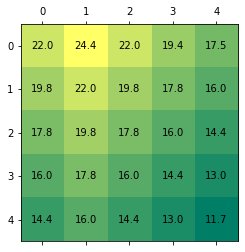

In [23]:
# matrix of coefficients before state values in the Bellman equation system
koefs = np.zeros((25,25))
# column of free values in the Bellman equation system
dependent = np.zeros(25)
# greedy strategy
gamma = 0.9

for j in range(5):
    for i in range(5):
        koefs[i + j*5], dependent[i + j*5]  = calculate_value_by_policy(i, j, gamma, A, B, A_, B_, policy, grid_side=5)
        koefs[i + j*5, i + j*5] = koefs[i + j*5, i + j*5] - 1       

#print(koefs)
#print(dependent)
# solve linear equation system via numpy solver
v = np.linalg.solve(koefs, -dependent)
v = v.reshape((5,5))
# this is values of grid world states with equiprobable random policy and gamma=0.9
vizualize_grid_values(v)

## Conclusion

In this notebook, the Bellman equations and their solutions were analyzed in cases where we fully know the dynamics of the system, and also the state space is not very large. However, even for known systems, applying a pure solution to a system of equations is often difficult. For example, above, we did not calculate the optimal strategy, which would require enumeration of many parameters. In the next section, we will show how optimal action values (or policies) can be iteratively arrived at using dynamic programming.